In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cardio.csv')
df.head(25)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,Hypertension Stage 1,Hypertension Stage 1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,60,37.729725,Hypertension Stage 1,Hypertension Stage 1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,61,29.983588,Hypertension Stage 1,Hypertension Stage 1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48,28.440955,Normal,Normal
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54,25.282570,Normal,Normal


Source of the data unknown 

https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/discussion/361296

https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/discussion/78829

# Potential questions 

### General Health
What is the general health profile of the population in the dataset?
Average age, weight, height, and other health metrics.
How prevalent are risk factors like smoking, alcohol, and low physical activity among the population?
Proportion of people who smoke, consume alcohol, or are not physically active.


### Disease Prevalence
What is the prevalence of cardiovascular disease in this dataset?
Proportion of people with cardiovascular disease vs. those without.
Are there noticeable gender differences in the prevalence of cardiovascular diseases?
Compare cardiovascular disease rates among different genders.


### Risk Factors
Which factors are strongly correlated with cardiovascular diseases?
Investigate correlations between cardiovascular disease and other variables.
Do people with higher cholesterol or glucose levels have a higher incidence of cardiovascular disease?
Examine the relationship between cholesterol, glucose levels, and cardiovascular diseases.


### Predictive Modeling
Can we predict the likelihood of someone having a cardiovascular disease based on their health metrics?
Build and evaluate predictive models.


### Cohort Analysis
Are younger people less likely to have cardiovascular diseases compared to older people?
Age-wise distribution of cardiovascular diseases.
How do health metrics differ among people with and without cardiovascular diseases?
Comparative analysis based on the presence or absence of cardiovascular diseases.


### Lifestyle Choices
Is there a relationship between lifestyle choices (smoking, alcohol, physical activity) and cardiovascular diseases?
Analyze lifestyle choices as potential risk factors.


### Health Segmentation
What distinct health profiles can we identify in the population?
Cluster individuals based on metrics like age, weight, height, and blood pressure to identify unique health profiles.
Are there specific clusters that are more prone to cardiovascular diseases?
After clustering, check the prevalence of cardiovascular diseases in each cluster to identify high-risk groups


### Risk Factor Combinations
Are there specific combinations of risk factors that tend to occur together?
For example, does a sedentary lifestyle combined with high cholesterol levels form a distinct cluster?

In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [4]:
df.shape

(68205, 17)

In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
columns_with_missing = missing_values[missing_values > 0]
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
Series([], dtype: int64)


In [14]:
# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


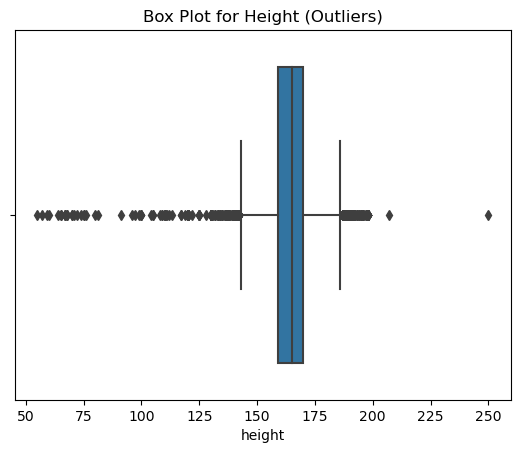

In [16]:
# Visualize outliers using a box plot
sns.boxplot(x=df['height'])
plt.title('Box Plot for Height (Outliers)')
plt.show()

In [7]:
df.describe(include=['O'])

,bp_category,bp_category_encoded
count,68205,68205
unique,4,4
top,Hypertension Stage 1,Hypertension Stage 1
freq,39750,39750


In [8]:
df.isnull().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

<Axes: xlabel='bp_category_encoded'>

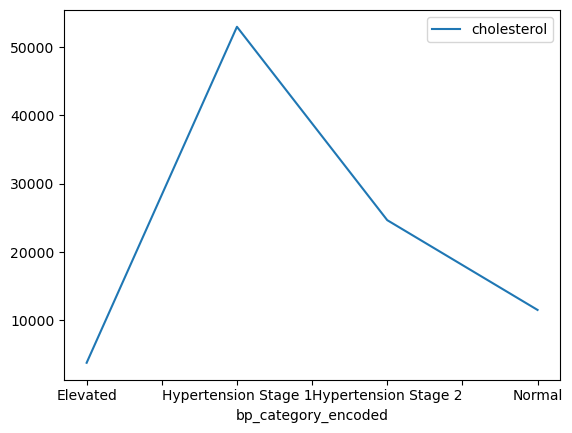

In [9]:
bmi_wise = df.groupby('bp_category_encoded').sum()[['cholesterol']]
bmi_wise.plot()

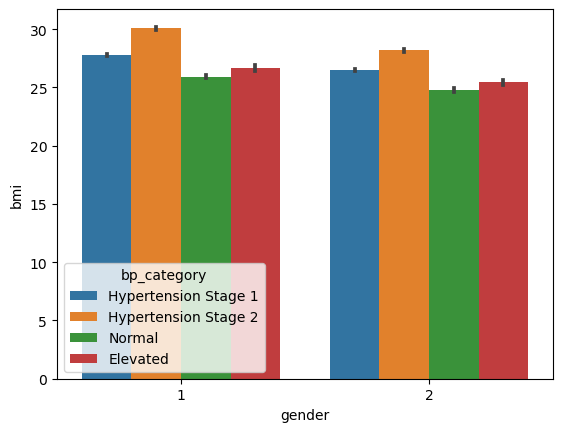

In [10]:
bar_age = sns.barplot(x = 'gender', y = 'bmi', hue = 'bp_category',data = df)

<Axes: xlabel='weight', ylabel='bp_category'>

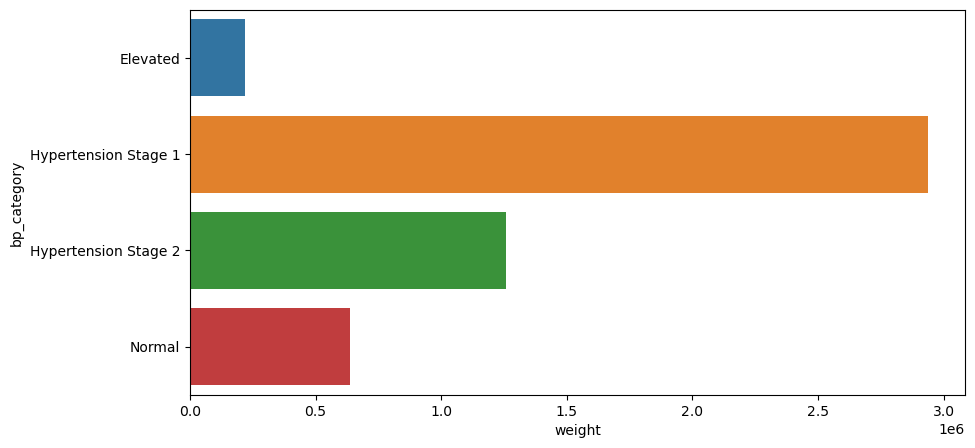

In [11]:
c = df.groupby('bp_category').sum(numeric_only=True).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=c, y='bp_category', x='weight')

In [12]:
sns.heatmap(df.corr());

ValueError: could not convert string to float: 'Hypertension Stage 1'

In [ ]:
df['age_years'].value_counts()

In [ ]:
#Predictive Modeling
#using logistic regression to predict the likelihood of cardiovascular disease.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting data
X = df[['age', 'gender', 'height', 'weight', 'cholesterol']]
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report for precision, recall, and F1-score
print(classification_report(y_test, y_pred))

In [ ]:
# Displaying coefficients
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
print(coefficients)

In [ ]:
#clustering 

from sklearn.cluster import KMeans
# K-means clustering
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['age_years', 'height', 'weight']])

In [ ]:
# View cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['age_years', 'height', 'weight'])
print("Cluster Centers:")
print(cluster_centers)

In [ ]:
# Count of data points in each cluster
cluster_counts = df['cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_counts)

In [ ]:
# 2D scatter plot of clusters
sns.scatterplot(x='age_years', y='weight', hue='cluster', data=df)
plt.title('2D Scatter Plot of Clusters')
plt.show()

In [ ]:
# Summary statistics for each cluster
cluster_summary = df.groupby('cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

In [ ]:
df['ap_hi'].min()

In [ ]:
df['ap_lo'].min()

In [ ]:
df['weight'].mean()

In [ ]:
df['weight'].max()

In [ ]:
df['height'].min()

In [ ]:
df['height'].max()

In [ ]:
df['age_years'].min()

In [ ]:
sorted_height_desc = df['height'].sort_values(ascending=False)
sorted_height_desc.head(10)

In [ ]:
sorted_height_asc = df['height'].sort_values(ascending=True)
sorted_height_asc.head(10)

In [ ]:
sorted_weight_desc = df['weight'].sort_values(ascending=False)
sorted_weight_desc.head(10)

In [ ]:
sorted_weight_asc = df['weight'].sort_values(ascending=True)
sorted_weight_asc.head(10)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the column with numeric data
sns.boxplot(x=df['ap_hi'])

plt.title('Box Plot for Outliers')
plt.show()